## **PROBLEM STATEMENT :**
To predict the percentage of marks that a student is expected to score based upon the number of hours they studied.
##  APPROACH :
 As the problem contains only two variables , we can easily solve it with the help of LINEAR REGRESSION.

In [2]:
# import the libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [3]:
# reading data from the link
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")

df.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


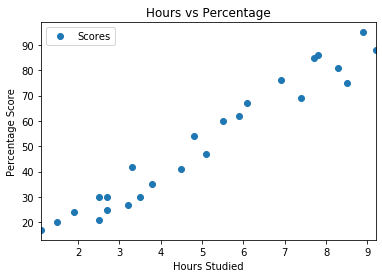

In [4]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**As we can see from the above plot, there is a positive linear relationship between the No. of Hours studied and Percentge Score.**

In [5]:
# Data Preprocessing
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

 *Here we have divided our data into attributes and labels.*

In [6]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

We have chosen test_size =0.2 which means 80% of our data will be used for our prediction and 20% for testing.
Here we have selected the random_state =0 which means the dataset we are using the same no of input each time we are running the code.


In [7]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

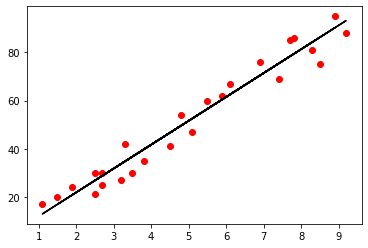

In [9]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y,color='red')
plt.plot(X, line, color='black');
plt.show()

In [50]:

X_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [38]:
y_pred = regressor.predict(X_test) # Predicting the scores

In [39]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [41]:
# Comparing Actual vs Predicted
sf = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
sf 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [44]:
# for 9.25 hours
hours= np.array([9.25])
hours= hours.reshape(-1,1)
hours.shape

(1, 1)

In [47]:
own_prediction=regressor.predict(hours)
print('No. of hours:',hours[0][0])
print('Predicted Percentage:', own_prediction)

No. of hours: 9.25
Predicted Percentage: [93.69173249]


## Evaluating the Model

In [49]:
from sklearn import metrics
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982
